In [1]:
import gc
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [2]:
# 원본 이미지 데이터
train_images.shape

(60000, 784)

In [3]:
train_images_with_noise_channels.shape

(60000, 1568)

In [4]:
train_images_with_zeros_channels.shape

(60000, 1568)

In [5]:
# 백색 잡음과 0을 추가한 mnist 데이터에서 모델 훈련
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.6281 - accuracy: 0.8110 - val_loss: 0.3674 - val_accuracy: 0.8748
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2496 - accuracy: 0.9233 - val_loss: 0.1974 - val_accuracy: 0.9403
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1643 - accuracy: 0.9493 - val_loss: 0.1973 - val_accuracy: 0.9408
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1155 - accuracy: 0.9639 - val_loss: 0.1571 - val_accuracy: 0.9537
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0866 - accuracy: 0.9722 - val_loss: 0.1275 - val_accuracy: 0.9621
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0635 - accuracy: 0.9799 - val_loss: 0.1470 - val_accuracy: 0.9590
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0493 - accuracy: 0.9841 - val_loss: 0.1192 - val_accuracy: 0.9667
Epoch 

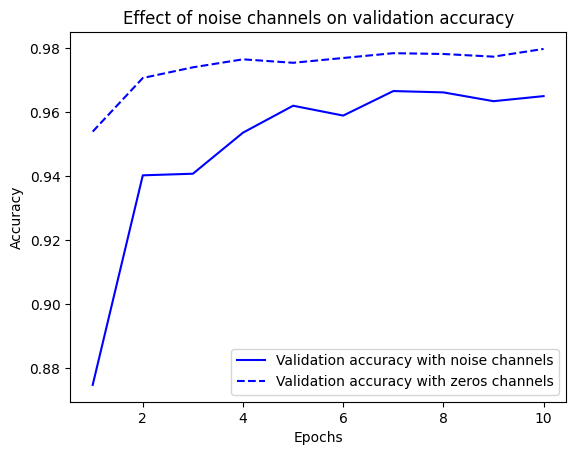

In [6]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()